# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [1]:
# Details Student 1:
print("Daniel Katanov 322566340 danikatanov01@gmail.com")

# Details Student 2:


Daniel Katanov 322566340 danikatanov01@gmail.com


## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [2]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [3]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [4]:
# word net installation:

# unmark if you want to use and need to install
!pip install wn
!python -m wn download omw-he:1.4


Cached file found: C:\Users\אני\.wn_data\downloads\7ecf10e89326bc0ac26ad94b40fe60a7b6ac3302

Checking C:\Users\D4CC~1\AppData\Local\Temp\tmpp6sdordh\omw-he\omw-he.xml
Skipping omw-he:1.4 (Hebrew Wordnet); already added



In [5]:
# word net import:

# unmark if you want to use:
import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [6]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
!pip install hebrew_tokenizer

In [7]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht

C:\Users\אני


### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [8]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [9]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [10]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

In [11]:
# YOUR CODE HERE
X_test  = df_test['story']
X_train = df_train['story']
y_train = df_train['gender']

def func1(story): #function that change story to word
    my_list=[]#create list
    tokens=ht.tokenize(story)# tokenization
    for X, token, token_num,(first_index,last_index) in tokens:#X its a group of tokens 
        if X=='HEBREW':#check if the lng is hebrew
            my_list.append(token)
        
    return my_list

#the for check if the word in hebrew if yes put in the list 


In [12]:

def func2(train, test):
    words_train = []
    for story in train:
        words_train.append(func1(story))

    words_test = []
    for story in test:
        words_test.append(func1(story))

    
    # returns train and test sets.
    return words_train, words_test

# preprossesing the data
X_train_processed, X_test_processed = func2(X_train, X_test)

In [13]:
def func3(words_train,words_test,size_of_vocabulary=1450):#func that get the features
    vectorizer = CountVectorizer(max_features=size_of_vocabulary,   
                preprocessor=lambda x: x, tokenizer=lambda x: x)# limit the number of features and do vectorization to the text
    features_train = vectorizer.fit_transform(words_train).toarray()#fit the vocabulary the train data
    features_test = vectorizer.transform(words_test).toarray()#test on the vocabulary 
    vocabulary = vectorizer.vocabulary_#put the vectorization in the vocabulary to original vocabulary
    return features_train, features_test, vocabulary
    
    
X_train_bow, X_test_bow, vocabulary = func3(X_train_processed, X_test_processed)


In [14]:
#knn model
# Features for the test data
test_X_custom = X_test_bow

# Initialize a k-nearest neighbors (KNN) classifier
classifier_custom = KNeighborsClassifier()

# Define hyperparameter grid for grid search
param_grid_custom = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Perform grid search with cross-validation
grid_search_custom = GridSearchCV(classifier_custom, param_grid_custom, cv=8, scoring='f1_macro')
grid_search_custom.fit(X_train_bow, y_train)

# Get the best estimator from grid search
best_classifier_custom = grid_search_custom.best_estimator_

# Perform cross-validation and calculate F1 scores using the best classifier
f1_scores_custom = cross_val_score(best_classifier_custom, X_train_bow, y_train, cv=8, scoring='f1_macro')

# Calculate the average F1-score across all folds using the best classifier
average_f1_custom = np.mean(f1_scores_custom)
print('Average F1 score on cross-validation with best classifier:', average_f1_custom)

# Train the best classifier using the full training data
best_classifier_custom.fit(X_train_bow, y_train)

# Predict genders for the test set using the best classifier
predictions_knn_test_custom = best_classifier_custom.predict(test_X_custom)


GridSearchCV(cv=8, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='f1_macro')

Average F1 score on cross-validation with best classifier: 0.563557236975124


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3, weights='distance')

In [15]:
#linear svc model 
# Features for the test data
test_X_custom = X_test_bow

# Initialize a Linear Support Vector Classifier (LinearSVC)
classifier_custom = LinearSVC()

# Define hyperparameter grid for grid search
param_grid_custom = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge']
}

# Perform grid search with cross-validation
grid_search_custom = GridSearchCV(classifier_custom, param_grid_custom, cv=8, scoring='f1_macro')
grid_search_custom.fit(X_train_bow, y_train)

# Get the best estimator from grid search
best_classifier_custom = grid_search_custom.best_estimator_

# Perform cross-validation and calculate F1 scores using the best classifier
f1_scores_custom = cross_val_score(best_classifier_custom, X_train_bow, y_train, cv=8, scoring='f1_macro')

# Calculate the average F1-score across all folds using the best classifier
average_f1_custom = np.mean(f1_scores_custom)
print('Average F1 score on cross-validation with best classifier:', average_f1_custom)

# Train the best classifier using the full training data
best_classifier_custom.fit(X_train_bow, y_train)

# Predict genders for the test set using the best classifier
predictions_svm_test_custom = best_classifier_custom.predict(test_X_custom)


GridSearchCV(cv=8, estimator=LinearSVC(),
             param_grid={'C': [0.1, 1.0, 10.0],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

Average F1 score on cross-validation with best classifier: 0.651750999632717


LinearSVC(C=0.1, loss='hinge')

In [16]:
#naive bayes model
# Features for the test data
test_X_custom = X_test_bow

# Initialize a Naive Bayes classifier (suitable for classification with discrete features)
classifier_custom = MultinomialNB()

# Define hyperparameter grid for grid search
param_grid_custom = {
    'alpha': [0.1, 0.5, 1.0]
}

# Perform grid search with cross-validation
grid_search_custom = GridSearchCV(classifier_custom, param_grid_custom, cv=8, scoring='f1_macro')
grid_search_custom.fit(X_train_bow, y_train)

# Get the best estimator from grid search
best_classifier_custom = grid_search_custom.best_estimator_

# Perform cross-validation and calculate F1 scores using the best classifier
f1_scores_custom = cross_val_score(best_classifier_custom, X_train_bow, y_train, cv=8, scoring='f1_macro')

# Calculate the average F1-score across all folds using the best classifier
average_f1_custom = np.mean(f1_scores_custom)
print('Average F1 score on cross-validation with best classifier:', average_f1_custom)

# Train the best classifier using the full training data
best_classifier_custom.fit(X_train_bow, y_train)

# Predict genders for the test set using the best classifier
predictions_bayes_test = best_classifier_custom.predict(test_X_custom)


GridSearchCV(cv=8, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0]}, scoring='f1_macro')

Average F1 score on cross-validation with best classifier: 0.6900481607793134


MultinomialNB(alpha=0.5)

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 3 artists>

Text(0.5, 0, 'Models')

Text(0, 0.5, 'F1-score')

Text(0.5, 1.0, 'F1 average results')

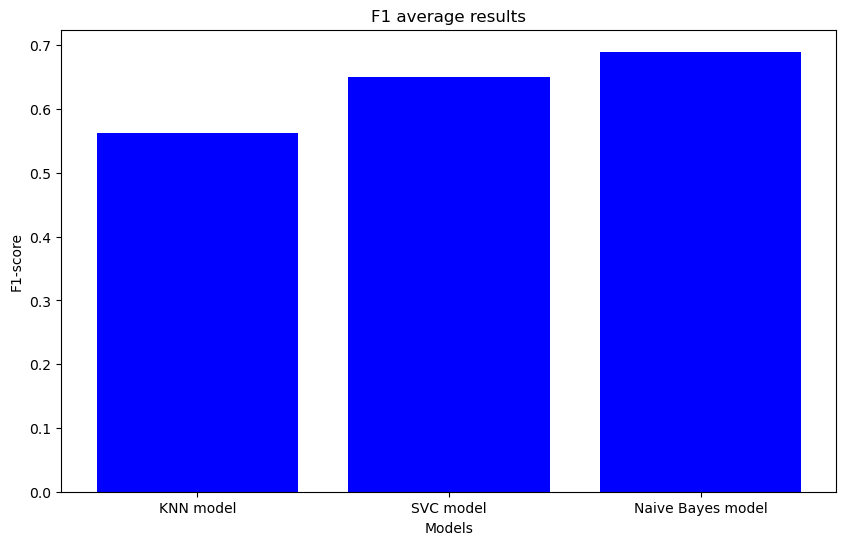

Model 3 has the highest F1-score, I'm using the Naive Bayes model.


In [17]:
f1_scores = {
    'KNN model': 0.563,
    'SVC model': 0.651,
    'Naive Bayes model': 0.690
}

plt.figure(figsize=(10, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color='blue')
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.title('F1 average results')
plt.show()


print("Model 3 has the highest F1-score, I'm using the Naive Bayes model.")


### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [18]:

df_predicted = pd.DataFrame({'test_example_id': df_test['test_example_id'],'predicted_category': predictions_bayes_test})
df_predicted.head()
df_predicted.tail()
female_count = df_predicted[df_predicted['predicted_category'] == 'f'].shape[0]
print("Number of females:", female_count)
male_count = df_predicted[df_predicted['predicted_category'] == 'm'].shape[0]
print("Number of males:", male_count)
df_predicted.to_csv('classification_results.csv',index=False)


,test_example_id,predicted_category
0,0,m
1,1,m
2,2,m
3,3,m
4,4,f


,test_example_id,predicted_category
318,318,m
319,319,m
320,320,m
321,321,m
322,322,m


Number of females: 61
Number of males: 262
